## Converting binary to csv

In [16]:
from load_data import convert_raw_to_csv 

folder_path = 'datasets/raw_datasets/'
time_scale = 's'
voltage_scale = 'uV'
save_path = 'csv_2/'

convert_raw_to_csv(folder_path, time_scale, voltage_scale, save_path)

datasets/raw_datasets/Data_20251031_101158_Georg.bin
File:  datasets/raw_datasets/Data_20251031_101158_Georg.bin
Sample Rate:  500.0
Signal Gain:  12.0
Voltage Scale Factor:  1000000.0
Time Scale Factor:  1
Gain Scaling:  1.1908944212550836e-08
datasets/raw_datasets/Data_20251031_103417_Muratcan.bin
File:  datasets/raw_datasets/Data_20251031_103417_Muratcan.bin
Sample Rate:  500.0
Signal Gain:  12.0
Voltage Scale Factor:  1000000.0
Time Scale Factor:  1
Gain Scaling:  1.1908944212550836e-08
datasets/raw_datasets/Data_20251031_105214_Samuel.bin
File:  datasets/raw_datasets/Data_20251031_105214_Samuel.bin
Sample Rate:  500.0
Signal Gain:  12.0
Voltage Scale Factor:  1000000.0
Time Scale Factor:  1
Gain Scaling:  1.1908944212550836e-08
datasets/raw_datasets/Data_20251031_111742_Cornel.bin
File:  datasets/raw_datasets/Data_20251031_111742_Cornel.bin
Sample Rate:  500.0
Signal Gain:  12.0
Voltage Scale Factor:  1000000.0
Time Scale Factor:  1
Gain Scaling:  1.1908944212550836e-08
datasets/r

##  Loading csv files to check for formating and to figure out slicing 

Loaded: EEG shape (8, 219814), Trigger shape (219814,)
After slicing: EEG shape (8, 187500), Trigger shape (187500,) 

Window length: 500 samples (1.0s), Step: 250 samples

=== Detected contiguous regions (label, start, end, length) ===
Label 0.0 | Start: 0      | End: 10403  | Len: 10403
Label 3.0 | Start: 10403  | End: 15408  | Len: 5005
Label 0.0 | Start: 15408  | End: 22059  | Len: 6651
Label 4.0 | Start: 22059  | End: 27070  | Len: 5011
Label 0.0 | Start: 27070  | End: 27073  | Len: 3
Label 4.0 | Start: 27073  | End: 27077  | Len: 4
Label 0.0 | Start: 27077  | End: 34565  | Len: 7488
Label 4.0 | Start: 34565  | End: 39576  | Len: 5011
Label 0.0 | Start: 39576  | End: 47278  | Len: 7702
Label 5.0 | Start: 47278  | End: 52289  | Len: 5011
Label 0.0 | Start: 52289  | End: 59096  | Len: 6807
Label 1.0 | Start: 59096  | End: 64108  | Len: 5012
Label 0.0 | Start: 64108  | End: 72522  | Len: 8414
Label 1.0 | Start: 72522  | End: 77534  | Len: 5012
Label 0.0 | Start: 77534  | End: 84241  

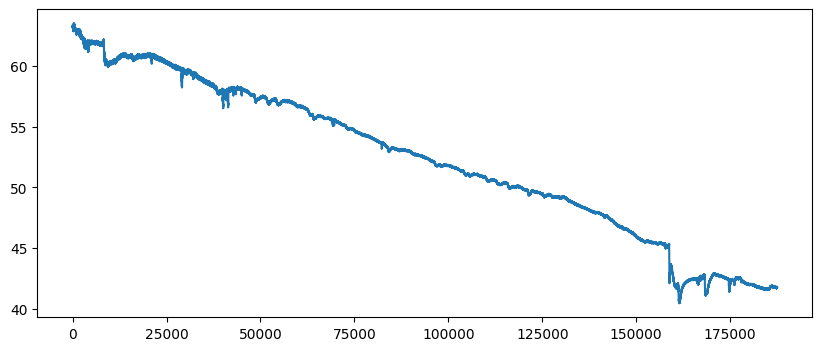

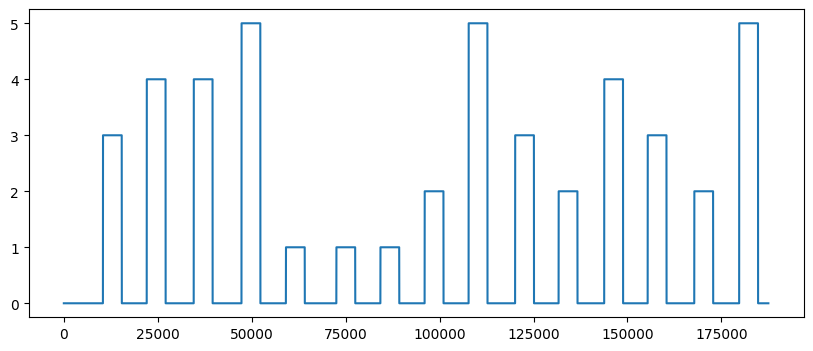

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from Utils import get_eeg_data_segmented, load_and_concat_ssvep_datasets


# file_path = "datasets/csv/Data_20251031_101158_1.csv"
# EEG_SLICE = slice(10000, 170000)
# file_path = "datasets/csv/Data_20251031_103417_2.csv"
# EEG_SLICE = slice(16000, 160000)
# file_path = "datasets/csv/Data_20251031_105214_3.csv"
# EEG_SLICE = slice(0, 20000000)
# EEG_SLICE = slice(5000, 160000)
# file_path = "datasets/csv/Data_20251031_111742_4.csv"
# EEG_SLICE = slice(5000, 150000)
file_path = "datasets/csv/Data_20251107_110538_georg.csv"
EEG_SLICE = slice(25000, 212500) # cut 157000:160000
# file_path = "datasets/csv/Data_20251107_111659_georg.csv"
# EEG_SLICE = slice(14000, 195000)


# Use your integrated function
X, y, eeg, trigger = get_eeg_data_segmented(
    csv_path=file_path,
    sample_rate=500,
    window_size=1.0,
    overlap=0.5,
    data_slice=EEG_SLICE,
    rest_threshold=0.3,
    filter=False
)

# plt.figure(figsize=(10,4))
# plt.plot(X[:, 2, :])  # 27th window, first channel, all 500 samples 
# plt.show()

plt.figure(figsize=(10,4))
plt.plot(eeg[0,:])  # first channel
plt.show()

plt.figure(figsize=(10,4))
plt.plot(trigger[:])
plt.show()


## Load SSVEP Data from csv list with slices, concat and then save as .npz

In [13]:
# ============================================================
# 1. Imports
# ============================================================
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from Utils import get_eeg_data_segmented, load_and_concat_ssvep_datasets, downsample_label

# all frequiencies sorted = [5, 7, 8.6, 10.5, 11, 12, 13.4, 15.2, 17, 18.1]
#                         = [1, 2,   3,    4,  5,  6,    7,    8,  9,   10]
datasets = [
    ("datasets/csv/Data_20251031_101158_1.csv", slice(10000, 170000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}), 
    # ("datasets/csv/Data_20251031_103417_2.csv", slice(16000, 160000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}),
    # ("datasets/csv/Data_20251031_105214_3.csv", slice(5000,  160000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}), 
    ("datasets/csv/Data_20251031_111742_4.csv", slice(5000,  150000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}), 
    ("datasets/csv/Data_20251107_110538_georg.csv", slice(25000, 212500), {0: 0, 1: 1, 2: 3, 3: 5, 4: 7, 5: 9}),
    ("datasets/csv/Data_20251107_111659_georg.csv", slice(14000, 195000), {0: 0, 1: 1, 2: 3, 3: 5, 4: 7, 5: 9}),
]

X_all, y_all, eeg_all, trigger_all = load_and_concat_ssvep_datasets(
    datasets=datasets, 
    sample_rate=500,
    window_size=1.0,
    overlap=0.5,
    verbose=True,
    filter=True,
)

X_bal, y_bal = downsample_label(X_all, y_all, target_label=0, keep_ratio=0.10)

print("Before:", np.unique(y_all, return_counts=True))
print("After:",  np.unique(y_bal, return_counts=True))
print(X_all.shape, y_all.shape)
print(X_bal.shape, y_bal.shape)

np.savez_compressed("ssvep_10_filter_GCGG.npz", X=X_bal, y=y_bal)


=== Loading 4 EEG files ===

[1/4] Processing datasets/csv/Data_20251031_101158_1.csv
   → Using slice 10000:170000
   → Applying custom mapping: {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}
Loaded: EEG shape (8, 176659), Trigger shape (176659,)
After slicing: EEG shape (8, 160000), Trigger shape (160000,)

Window length: 500 samples (1.0s), Step: 250 samples

=== Detected contiguous regions (label, start, end, length) ===
Label 0      | Start: 0      | End: 20692  | Len: 20692
Label 6      | Start: 20692  | End: 23199  | Len: 2507
Label 0      | Start: 23199  | End: 31886  | Len: 8687
Label 6      | Start: 31886  | End: 34394  | Len: 2508
Label 0      | Start: 34394  | End: 41550  | Len: 7156
Label 6      | Start: 41550  | End: 44057  | Len: 2507
Label 0      | Start: 44057  | End: 51124  | Len: 7067
Label 4      | Start: 51124  | End: 53607  | Len: 2483
Label 0      | Start: 53607  | End: 60155  | Len: 6548
Label 2      | Start: 60155  | End: 62664  | Len: 2509
Label 0      | Start: 62664 

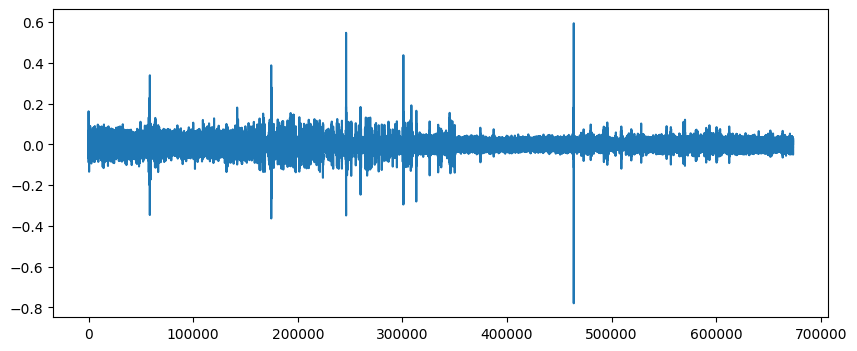

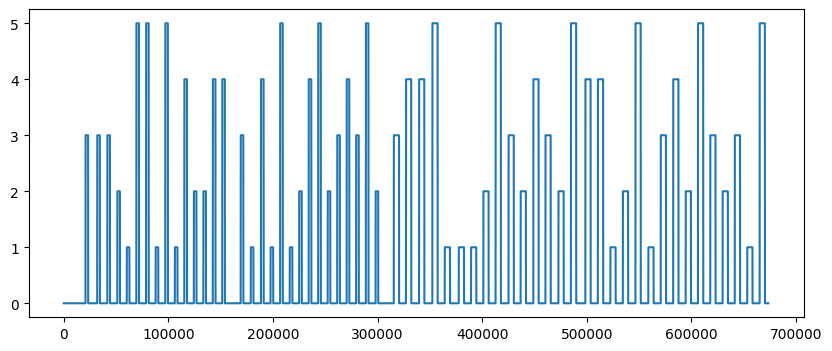

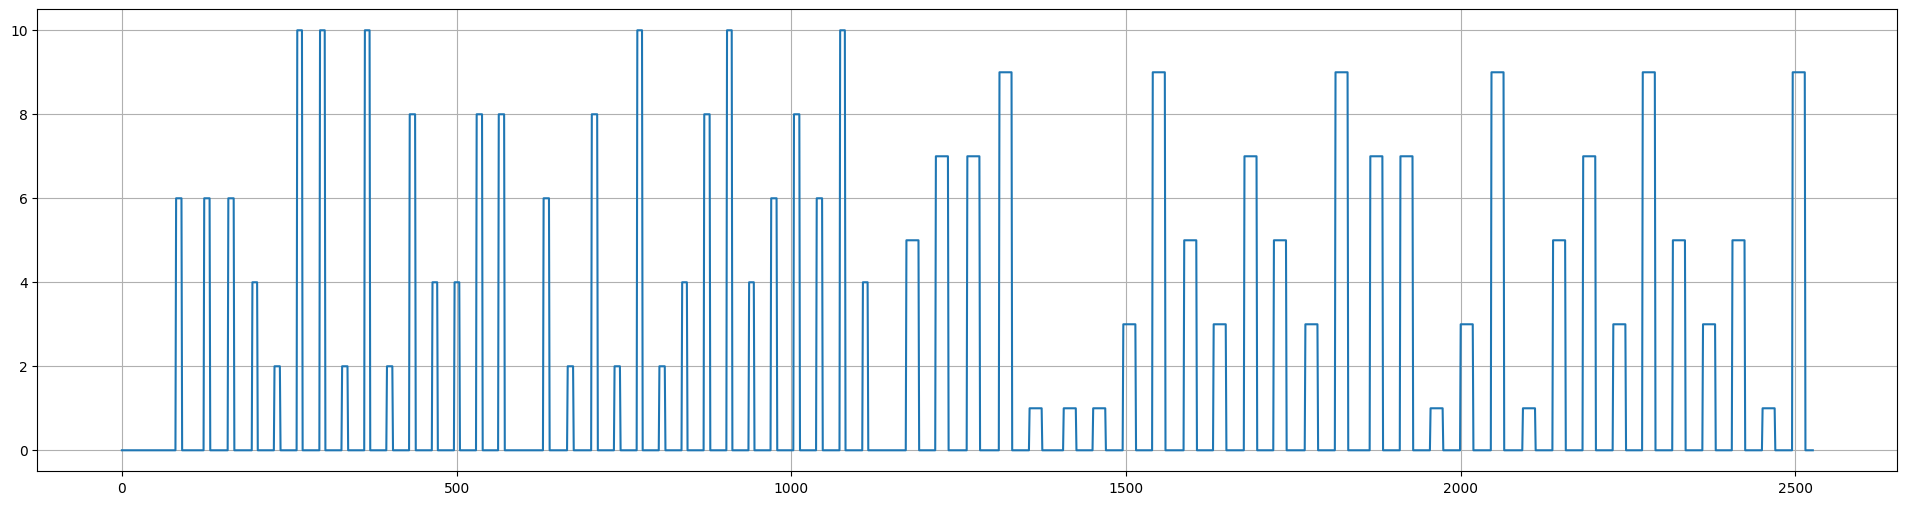

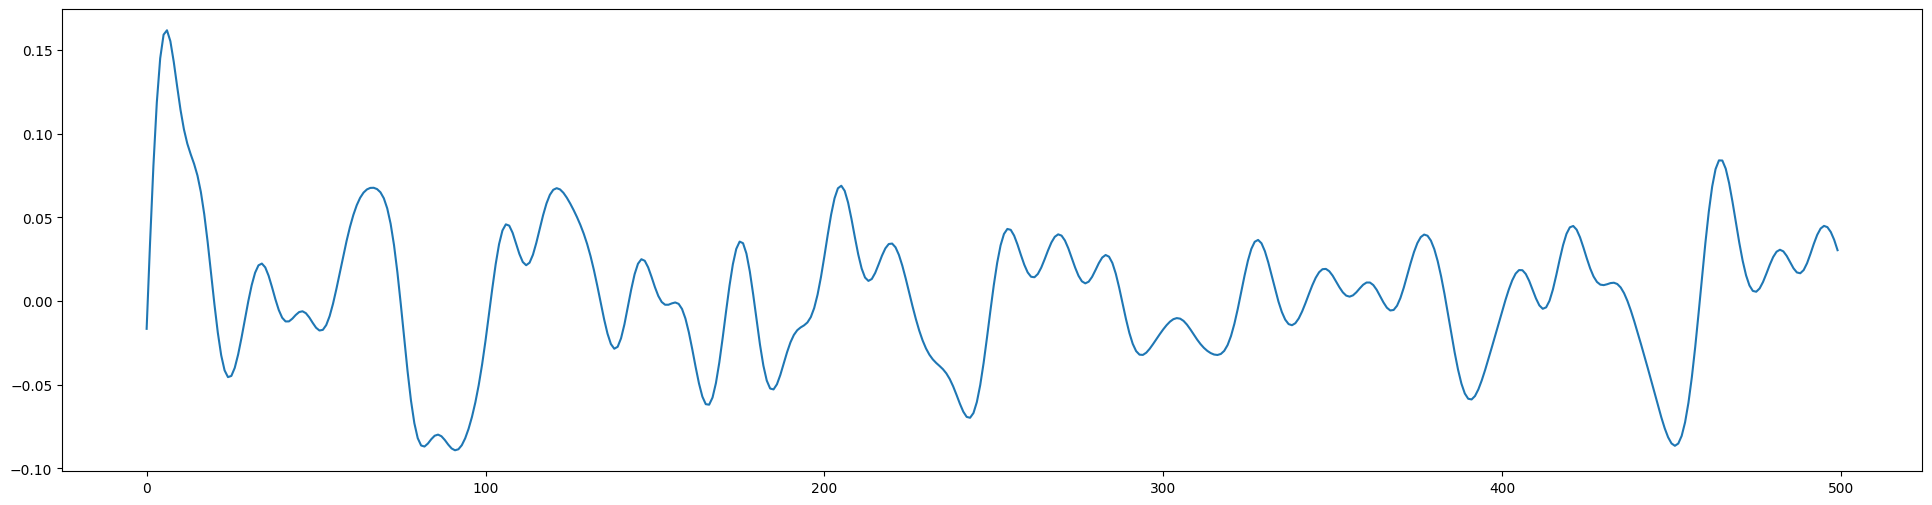

In [14]:
# data = np.load("datasets/numpy/ssvep_5_nofilter.npz")
# data = np.load("datasets/numpy/ssvep_5_filter.npz")
# data = np.load("datasets/numpy/ssvep_10_nofilter_GSGG.npz")
# data = np.load("datasets/numpy/ssvep_10_filter_GSGG.npz")
# X_all = data["X"]
# y_all = data["y"]

plt.figure(figsize=(10,4))
plt.plot(eeg_all[0,:])  # first channel
plt.show()

plt.figure(figsize=(10,4))
plt.plot(trigger_all)
plt.show()

plt.figure(figsize=(24,6))
plt.plot(y_all)
plt.grid()
plt.show()

plt.figure(figsize=(24,6))
plt.plot(X_all[0, 0, :])  # first window, first channel
plt.show()